## importing libs

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## set up the movie data

In [39]:
df=pd.read_csv(r"C:\Data Science\PythonProjects\Jupyter_Projects\DataSets\NoFolderDatasets\mymoviedb.csv",engine="python")
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [40]:
df.shape

(9837, 9)

## EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [42]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

We kinda don't need all these columns to start our recommendation system, so i will choose only `genres` and `overview` columns

In [43]:
df =df[["Genre","Overview","Title"]]
df

,Genre,Overview,Title
0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,Spider-Man: No Way Home
1,"Crime, Mystery, Thriller","In his second year of fighting crime, Batman u...",The Batman
2,Thriller,Stranded at a rest stop in the mountains durin...,No Exit
3,"Animation, Comedy, Family, Fantasy","The tale of an extraordinary family, the Madri...",Encanto
4,"Action, Adventure, Thriller, War",As a collection of history's worst tyrants and...,The King's Man
...,...,...,...
9832,"Drama, Crime",A dramatization of the Starkweather-Fugate kil...,Badlands
9833,Horror,A female vampire falls in love with a man she ...,Violent Delights
9834,"Mystery, Thriller, Horror",When young and successful reporter Jamie finds...,The Offering
9835,"Music, Drama, History",Billie Holiday spent much of her career being ...,The United States vs. Billie Holiday


In [44]:
df.isnull().sum()

Genre       11
Overview     9
Title        9
dtype: int64

Removing nulls

In [45]:
df=df.dropna()
df.isnull().sum()

Genre       0
Overview    0
Title       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genre     9826 non-null   object
 1   Overview  9826 non-null   object
 2   Title     9826 non-null   object
dtypes: object(3)
memory usage: 307.1+ KB


## Combining

In [47]:
df.loc[:, "Combined"] =df["Genre"]+" "+df["Overview"]+" "+df["Title"]
df

C:\Users\elhel\AppData\Local\Temp\ipykernel_19876\2189852745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Combined"] =df["Genre"]+" "+df["Overview"]+" "+df["Title"]


,Genre,Overview,Title,Combined
0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,Spider-Man: No Way Home,"Action, Adventure, Science Fiction Peter Parke..."
1,"Crime, Mystery, Thriller","In his second year of fighting crime, Batman u...",The Batman,"Crime, Mystery, Thriller In his second year of..."
2,Thriller,Stranded at a rest stop in the mountains durin...,No Exit,Thriller Stranded at a rest stop in the mounta...
3,"Animation, Comedy, Family, Fantasy","The tale of an extraordinary family, the Madri...",Encanto,"Animation, Comedy, Family, Fantasy The tale of..."
4,"Action, Adventure, Thriller, War",As a collection of history's worst tyrants and...,The King's Man,"Action, Adventure, Thriller, War As a collecti..."
...,...,...,...,...
9832,"Drama, Crime",A dramatization of the Starkweather-Fugate kil...,Badlands,"Drama, Crime A dramatization of the Starkweath..."
9833,Horror,A female vampire falls in love with a man she ...,Violent Delights,Horror A female vampire falls in love with a m...
9834,"Mystery, Thriller, Horror",When young and successful reporter Jamie finds...,The Offering,"Mystery, Thriller, Horror When young and succe..."
9835,"Music, Drama, History",Billie Holiday spent much of her career being ...,The United States vs. Billie Holiday,"Music, Drama, History Billie Holiday spent muc..."


Now we don't need the `Genre` and `Overview` columns as we've just combined them

In [48]:
df=df[["Title","Combined"]]
df

,Title,Combined
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction Peter Parke..."
1,The Batman,"Crime, Mystery, Thriller In his second year of..."
2,No Exit,Thriller Stranded at a rest stop in the mounta...
3,Encanto,"Animation, Comedy, Family, Fantasy The tale of..."
4,The King's Man,"Action, Adventure, Thriller, War As a collecti..."
...,...,...
9832,Badlands,"Drama, Crime A dramatization of the Starkweath..."
9833,Violent Delights,Horror A female vampire falls in love with a m...
9834,The Offering,"Mystery, Thriller, Horror When young and succe..."
9835,The United States vs. Billie Holiday,"Music, Drama, History Billie Holiday spent muc..."


i can see some commas in the `Combined` column so i will remove them

In [49]:
df.loc[:,"Combined"]=df["Combined"].str.replace(',','')
df

,Title,Combined
0,Spider-Man: No Way Home,Action Adventure Science Fiction Peter Parker ...
1,The Batman,Crime Mystery Thriller In his second year of f...
2,No Exit,Thriller Stranded at a rest stop in the mounta...
3,Encanto,Animation Comedy Family Fantasy The tale of an...
4,The King's Man,Action Adventure Thriller War As a collection ...
...,...,...
9832,Badlands,Drama Crime A dramatization of the Starkweathe...
9833,Violent Delights,Horror A female vampire falls in love with a m...
9834,The Offering,Mystery Thriller Horror When young and success...
9835,The United States vs. Billie Holiday,Music Drama History Billie Holiday spent much ...


# WordCloud

## A word cloud is a visualization technique where the size of each word corresponds to how frequently it appears in the data

In [50]:
combined_text = " ".join(df["Combined"])
# generate(combined_text) --> this funciton counts every word, removes boring "stop words" (like "the", "and", "is"), and calculates the size each word should be based on its frequency
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(combined_text)

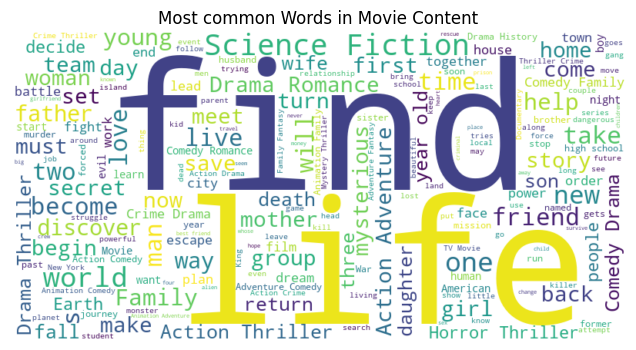

In [51]:
plt.figure(figsize=(10,4))
# "bilinear" --> is just a setting to make the letters look smoother and less pixelated.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most common Words in Movie Content")
plt.show()

i will add some words to the STOPWORD list to make the data more accurate

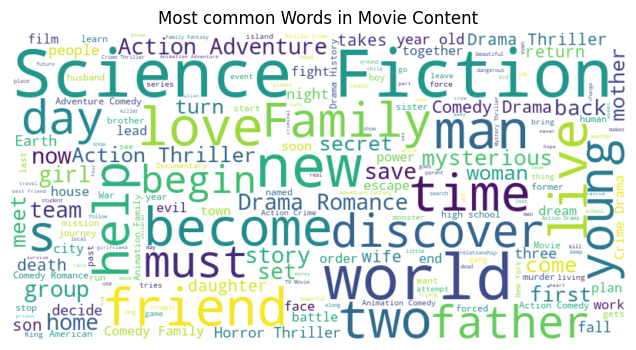

In [52]:
from wordcloud import STOPWORDS

my_stopwords =set(STOPWORDS)

my_stopwords.add("find")
my_stopwords.add("finds")
my_stopwords.add("one")
my_stopwords.add("way")
my_stopwords.add("will")
my_stopwords.add("take")
my_stopwords.add("make")
my_stopwords.add("life")

wordcloud=WordCloud(width=800,height=400,background_color="white",stopwords=my_stopwords).generate(combined_text)

#plotting again
plt.figure(figsize=(10,4))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most common Words in Movie Content")
plt.show()

# nltk

In [53]:
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elhel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\elhel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elhel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stop_words=set(stopwords.words("english"))

In [55]:
def fixing_text(text):
    # here i will remove any speacial character or any number
    text=re.sub(r"^a-zA-Z\s","",text)
    text=text.lower()
    tokens=word_tokenize(text)
    tokens=[word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [56]:
df.loc[:,"Cleaned_Combined"]=df["Combined"].apply(fixing_text)
df.head()

C:\Users\elhel\AppData\Local\Temp\ipykernel_19876\614236723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Cleaned_Combined"]=df["Combined"].apply(fixing_text)


,Title,Combined,Cleaned_Combined
0,Spider-Man: No Way Home,Action Adventure Science Fiction Peter Parker ...,action adventure science fiction peter parker ...
1,The Batman,Crime Mystery Thriller In his second year of f...,crime mystery thriller second year fighting cr...
2,No Exit,Thriller Stranded at a rest stop in the mounta...,thriller stranded rest stop mountains blizzard...
3,Encanto,Animation Comedy Family Fantasy The tale of an...,animation comedy family fantasy tale extraordi...
4,The King's Man,Action Adventure Thriller War As a collection ...,action adventure thriller war collection histo...


# TF-IDF (`Term Frequency-Inverse Document Frequency`)

In [ ]:
# min_df --> ignore words that apears in fewer than 3 movies (as they maybe not that important or could also be a typo)
# max_df --> ignore words that appears in more than 90% of the movies (as they considered as a useless common words)
# max_features --> just remember the top 5000 important words
tf_idf=TfidfVectorizer(min_df=3,max_df=0.9,max_features=5000)

tf_idf_matrix=tf_idf.fit_transform(df["Cleaned_Combined"]) 

# Cosine Similarity

In [58]:
cosineSimilarity=cosine_similarity(tf_idf_matrix,tf_idf_matrix)
cosineSimilarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.02411515,
        0.02077509],
       [0.        , 1.        , 0.00940127, ..., 0.02226704, 0.        ,
        0.02693161],
       [0.        , 0.00940127, 1.        , ..., 0.02881729, 0.02396393,
        0.        ],
       ...,
       [0.        , 0.02226704, 0.02881729, ..., 1.        , 0.        ,
        0.        ],
       [0.02411515, 0.        , 0.02396393, ..., 0.        , 1.        ,
        0.03770493],
       [0.02077509, 0.02693161, 0.        , ..., 0.        , 0.03770493,
        1.        ]], shape=(9826, 9826))

In [71]:
def recommendation_funtion(movie_name,cosineSimilarity=cosineSimilarity,data=df,top_n=5):
    idx=data[data["Title"].str.lower()==movie_name.lower()].index
    if len(idx)==0: # means that there is no movie in the list by this name
        return "No Movie by this Name in the dataset :("
    idx=idx[0]
    scores=list(enumerate(cosineSimilarity[idx])) # the `enumerate` for making a pair with the movie id and its score instead of just the score
    scores=sorted(scores,key=lambda x:x[1],reverse=True) # the lambda x:x[1] sort based on the second item in the pair (the Score), not the first item (the ID)
    scores=scores[1:top_n+1] # as the first index would surely be the same movie so we have to ignore it

    movie_idxs=[i[0] for i in scores]
    return data[['Title']].iloc[movie_idxs]


In [74]:
print(recommendation_funtion("batman"))

                                                  Title
2424                         Batman: Gotham by Gaslight
2487  Batman Unmasked: The Psychology of the Dark Kn...
260                                      Batman Returns
2162                 Batman Beyond: Return of the Joker
1639                             The Batman vs. Dracula


# Request

In [ ]:
import requests


def movie_informations(title,api_key):
    url=f"http://www.omdbapi.com/?t={title}&plot=full&apikey={api_key}"

    result=requests.get(url).json()

    if result.get("Response")=="True":
        result=result.get("Plot","NAN"),result.get("Poster","NAN"),result.get("Genre","NAN"),result.get("Ratings","NAN")
        plot=result[0]
        poster=result[1]
        genre=result[2]
        rating=result[3]

        return plot,poster,genre,rating
    
    return "NAN","NAN","NAN","NAN"
    